# Optimización de funciones escalares diferenciables con `SymPy`

<div id="apDiv1">
<table width="90%" border="0">
<tr>
<td><img src="https://sites.google.com/site/pfmportafolio20152/_/rsrc/1446081153413/avance-academico-1/2-4-extremos-relativos-criterios-de-la-1ra-2da-derivada/Captura.PNG" align="center"></td>
</tr>
</table>
</div>

> - La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
> - Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
> - El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

Algunas aplicaciones son:

1. Ingeniería
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
2. Distribución óptima de recursos.
 - Distribución de rutas de vuelo.
 - Planeación de ruta óptima.
3. Optimización financiera
 - Administración de riesgos.
 - Portafolios de inversión.
 
**Referencia:**
http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml

En esta clase veremos aspectos básicos de optimización. 

**Objetivo de la clase:** obtener máximos y mínimos de una función escalar de una variable.

___
## 0. Librerías que usaremos

`python` es un lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos; por tanto, para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

<img src="http://www.numpy.org/_static/numpy_logo.png" width="300px" height="100px" align="center">


`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:** <http://www.numpy.org/>

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [36]:
# importar la librería numpy
import numpy as np

### 0.2 `SymPy`

<img src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [37]:
# importar la librería sympy
import sympy as sym
# imprimir en formato latex 
sym.init_printing(use_latex='mathjax')

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

In [38]:
sym.var('x')

x

In [39]:
# diferencias de funciones de sympy y numpy
sym.sin(x)
np.sin(3)

0.1411200080598672

Explicar el uso de la sintaxis `from numpy import *` y sus peligros (no recomendable).

In [40]:
# importar con * y ver que pasa
# from numpy import *
# from sympy import *
# No recomendado

### 0.3 `PyPlot` de `matplotlib`

<img src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />


El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [41]:
# importar matplotlib.pyplot

import matplotlib.pyplot as plt


**Basamos todos los resultados en los siguientes teoremas:**

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=x^2$ tiene un mínimo global en $x=0$, pues

$$f(x)=x^2\geq0,\qquad\text{y}\qquad f(x)=x^2=0 \qquad\text{si y solo si}\qquad x=0.$$

In [42]:
# declarar la variable real x
sym.var('x', real='true')

x

In [43]:
# declarar ahora f=x^2 y mostrar
f=x**2
f

 2
x 

In [44]:
# derivar f respecto a x y mostrar
dfdx=sym.diff(f,x)
dfdx

2⋅x

In [45]:
# resolver f'(x)=0 y mostrar soluciones
xc=sym.solve(dfdx,x)
xc

[0]

Veamos la gráfica...

In [46]:
# convertir f e una función que se pueda evaluar numéricamente (función lambdify de la librería sympy)
fnum=sym.lambdify(x,f)


In [47]:
#Coordenadas x (abscisas)
#x = np.array([0, 0.1, 0.2, ])...
xnum=np.linspace(-10,10,200)
ynum=fnum(xnum)

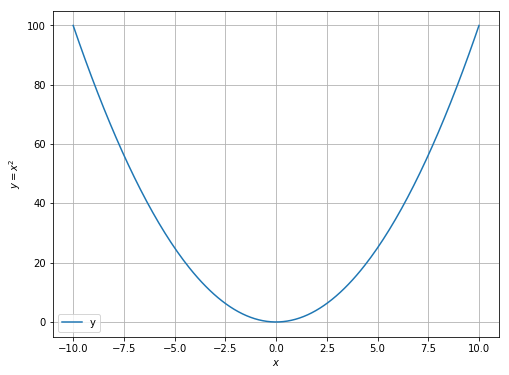

In [48]:
# Graficar
# Crear ventana de graficos y damos medidas de la ventana
plt.figure(figsize=(8,6))
# Sirve para hacer el grafico y determinar sus caracteristicas
plt.plot(xnum,ynum,'-')
# Nombre del eje x de la grafica
plt.xlabel('$x$')
# Nombre del eje y
plt.ylabel('$y=x^2$')
# Poner las etiquetas de las graficas
plt.legend('y=f(x)')
# Poner la cuadricula
plt.grid()

Ver diferencias entre f y f_num

In [49]:
# intentar evaluar f y f_num


**Otra manera de hacer lo anterior**

Concepto de función...

In [50]:
#Definir la funcion
def funcionx2(x):
    return x**2

In [74]:
#Definir x sym
x=sym.var('x',real='true')

In [75]:
#Definir f sym
fsym=funcionx2(x)
fsym

 2
x 

In [77]:
#Calcular la derivada 
dfdx=sym.diff(fsym,x)
dfdx

2⋅x

In [80]:
#Resolver la derivada 
xc=sym.solve(dfdx,x)
xc

[0]

In [55]:
#Graficar


El converso del teorema anterior no es cierto.

### Actividad
Considere $g(x)=x^3$. 
- Usando `sympy`, muestre que $g'(0)=0$.
- Sin embargo, descartar que $x=0$ es un extremo de $g(x)$ viendo su **gráfica**.

In [56]:
# Declarar la variable simbolica x


In [57]:
# Definimos funcion g(x)


In [58]:
# Derivamos g(x)


In [59]:
# Puntos criticos


In [60]:
# Graficar


## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=x^2$ tiene un mínimo relativo en $x=0$.

Ya vimos que $f'(0)=0$. Notemos que:

In [82]:
fsym

 2
x 

In [85]:
# Sacamos la segunda derivada
#d2f = sym.diff(f(x), x, x)
d2fdx2=sym.diff(fsym,x,2)
d2fdx2

2

In [86]:
d2fdx2>0

True

Por tanto, por el criterio de la segunda derivada, $f(0)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(x)=x^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

Como $g''(0)=0$ entonces el criterio de la segunda derivada no concluye.

### Actividad

¿Qué pasa con $h(x)=x^4$ al intentar utilizar el criterio de la segunda derivada?.

## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de f en el intervalo [a,b].

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-6x$ en $\left[0,5\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,5\right]$:

In [87]:
x=sym.var('x',real='true')

In [104]:
def funcionx3(a):
    return a**2-6*a
fsym2=funcionx3(x)
fsym2

 2      
x  - 6⋅x

In [105]:
df3=sym.diff(fsym2,x)
df3
xc=sym.solve(df3,x)
xc

[3]

Evaluamos $f$ en los extremos y en los puntos críticos:

In [111]:
[funcionx3(0),funcionx3(5),funcionx3(xc[0])]

[0, -5, -9]

Concluimos que el máximo absoluto de $f$ en $\left[0,5\right]$ es $0$ y se alcanza en $x=0$, y que el mínimo absoluto es $-9$ y se alcanza en $x=3$.

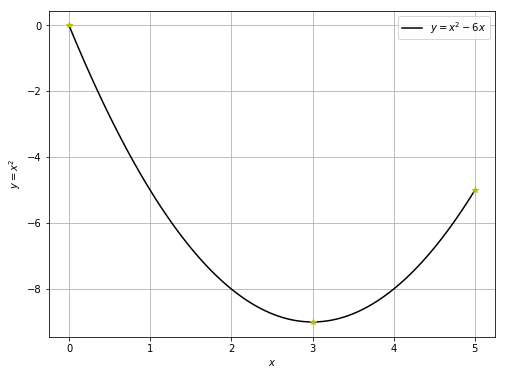

In [119]:
# Graficar
xnum2=np.linspace(0,5,100)
ynum2=funcionx3(xnum2)
# Graficar
# Crear ventana de graficos y damos medidas de la ventana
plt.figure(figsize=(8,6))
# Sirve para hacer el grafico y determinar sus caracteristicas
plt.plot(xnum2,ynum2,'-k',label='$y=x^2-6x$')
plt.plot(0,funcionx3(0),'*y')
plt.plot(5,funcionx3(5),'*y')
plt.plot(xc[0],funcionx3(xc[0]),'*y')
# Nombre del eje x de la grafica
plt.xlabel('$x$')
# Nombre del eje y
plt.ylabel('$y=x^2$')
# Poner las etiquetas de las graficas
plt.legend(loc='best')
# Poner la cuadricula
plt.grid()

### Actividad
Determinar los valores extremos absolutos de $h(x)=x^3-3x$ en $\left[-2.2,1.8\right]$, usando `sympy`. Mostrar en una gráfica.

### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

**Ejemplo:** hacer a mano a la vez para corroborar...

In [63]:
sym.var('x y')
x, y

(x, y)

In [64]:
def f(x, y):
    return x**2 + y**2

In [65]:
dfx = sym.diff(f(x,y), x)
dfy = sym.diff(f(x,y), y)
dfx, dfy

(2⋅x, 2⋅y)

In [66]:
xy_c = sym.solve([dfx, dfy], [x, y])
xy_c

{x: 0, y: 0}

In [67]:
x_c, y_c = xy_c[x], xy_c[y]
x_c, y_c

(0, 0)

In [68]:
d2fx = sym.diff(f(x,y), x, 2)
d2fy = sym.diff(f(x,y), y, 2)
dfxy = sym.diff(f(x,y), x, y)

Jf = sym.Matrix([[d2fx, dfxy], [dfxy, d2fy]])
Jf.eigenvals()

{2: 2}

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

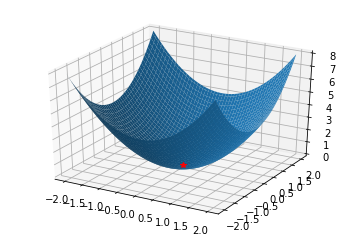

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = x
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, f(X, Y))
ax.plot([x_c], [y_c], [f(x_c,y_c)], '*r')

In [126]:
def funcionx4(x,y):
    return x**2+2*x*y+y**2
x=sym.var('x')
y=sym.var('y')
f4=funcionx4(x,y)
f4

 2            2
x  + 2⋅x⋅y + y 

In [129]:
dfx=sym.diff(f4,x)
dfy=sym.diff(f4,y)
[dfx,dfy]
xc1=sym.solve(dfx,x)
yc1=sym.solve(dfy,y)
[xc1,yc1]

[[-y], [-x]]

### Tareas.

1. Introducción a numpy. Obtener máximos y mínimos absolutos, usando `sympy`, de las funciones dadas en los intervalos dados, y graficar la función en dicho intervalo señalando los puntos máximo y mínimo absolutos.